## Legendary Pokemon Classification

* dataset to use
    * [kaggle Pokemon with stats](https://www.kaggle.com/abcsds/pokemon)

### 1. EDA

**@libray import**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

**@load dataset**

In [3]:
import os
csv_path = os.getcwd()+ '/Pokemon.csv'
original_data = pd.read_csv(csv_path)

'''
In the future, It will copy datasets because I will do various tasks in datasets
while dealing with data.
'''
# copy pokemon dataset
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


: Datasets consist of 800 rows and 13 coulmns.
<br/>
In other words, there are 800 Pokemons and 13 features that explain each Pokemon.

In [4]:
# legendary pokemon dataset
legendary = pokemon[pokemon["Legendary"] == True]
print(legendary.shape)
legendary.head(2)

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True


In [5]:
# originary pokemon dataset
ordinary = pokemon[pokemon["Legendary"] == False]
print(ordinary.shape)
ordinary.head(2)

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


: Need to find the legendary Pokemon, <br/>
<br/>
"Legendary" == True values with Pokemon are stored in the legendary variable. <br/>
<br/>
"Legendary" == False values with Pokemon are stored in the ordinary variable. 

**@Check missing value**

In [6]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

: Type2(str): Second attribute; For Pokemon with only one attribute, Type 2 has NaN(missing value).

In [8]:
# Double check with set()
len(set(pokemon["#"]))

# The id value of "#" isn't unique.

721

In [9]:
pokemon[pokemon["#"]== 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [10]:
len(set(pokemon["Name"]))
# The name is unique.

800

In [11]:
# check Type1 & Type2
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [12]:
# Check how many types of each attribute are in.
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [13]:
# The differece set of Type 2 and Type 1 is NaN
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

In [14]:
# Save all types of Pokemon in types.
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Fighting', 'Psychic', 'Fairy', 'Poison', 'Dragon', 'Normal', 'Ground', 'Ice', 'Steel', 'Water', 'Electric', 'Grass', 'Fire', 'Rock', 'Bug', 'Ghost', 'Dark', 'Flying']


In [15]:
pokemon["Type 2"].isna().sum()

386

**@Type 1 data distribution plot**

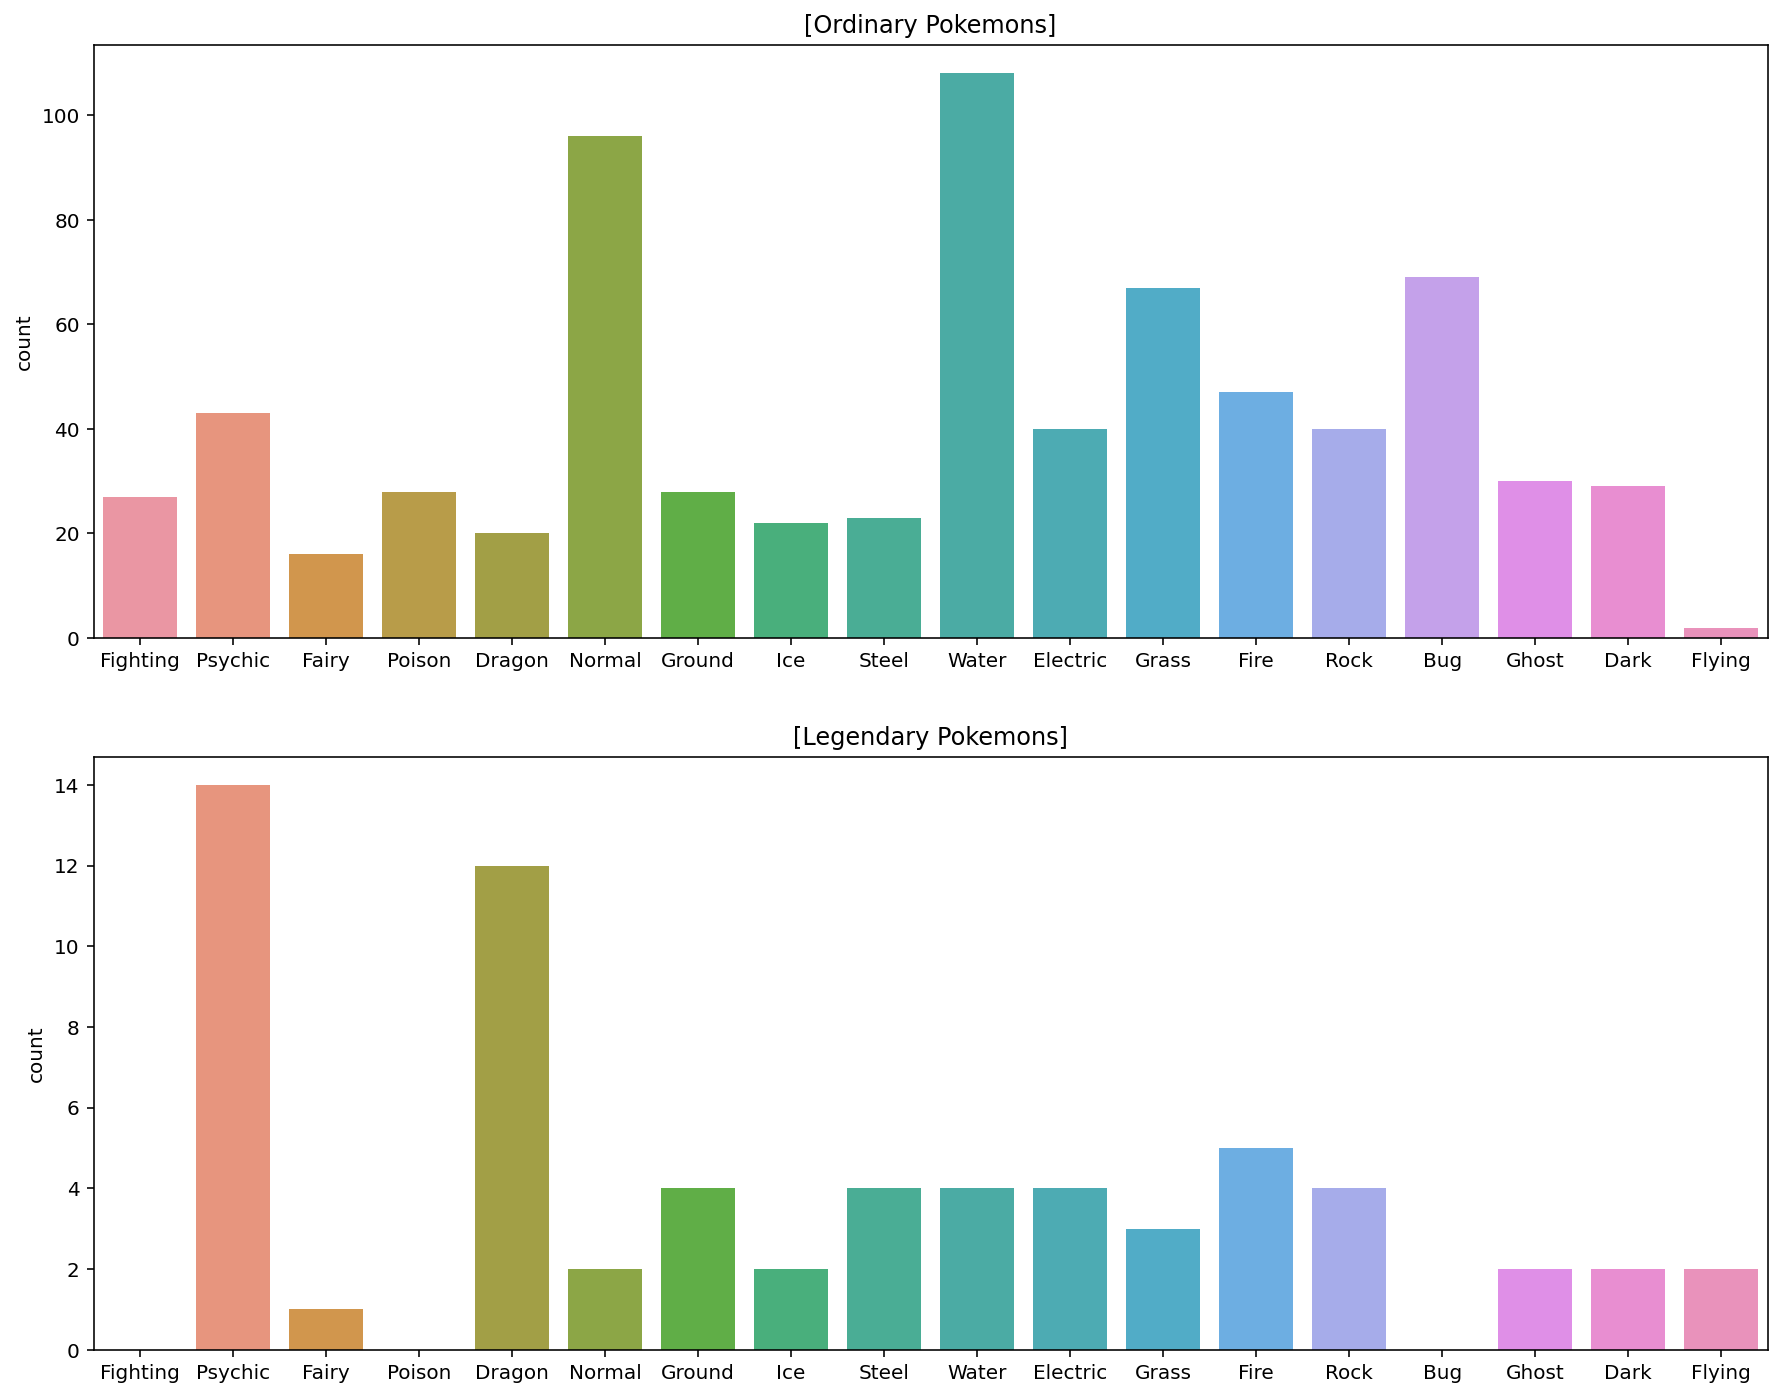

In [16]:
plt.figure(figsize=(15, 12))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [17]:
# Pivot table showing the ratio of Legendary by Type1
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


**@Type 2 data distribution plot**

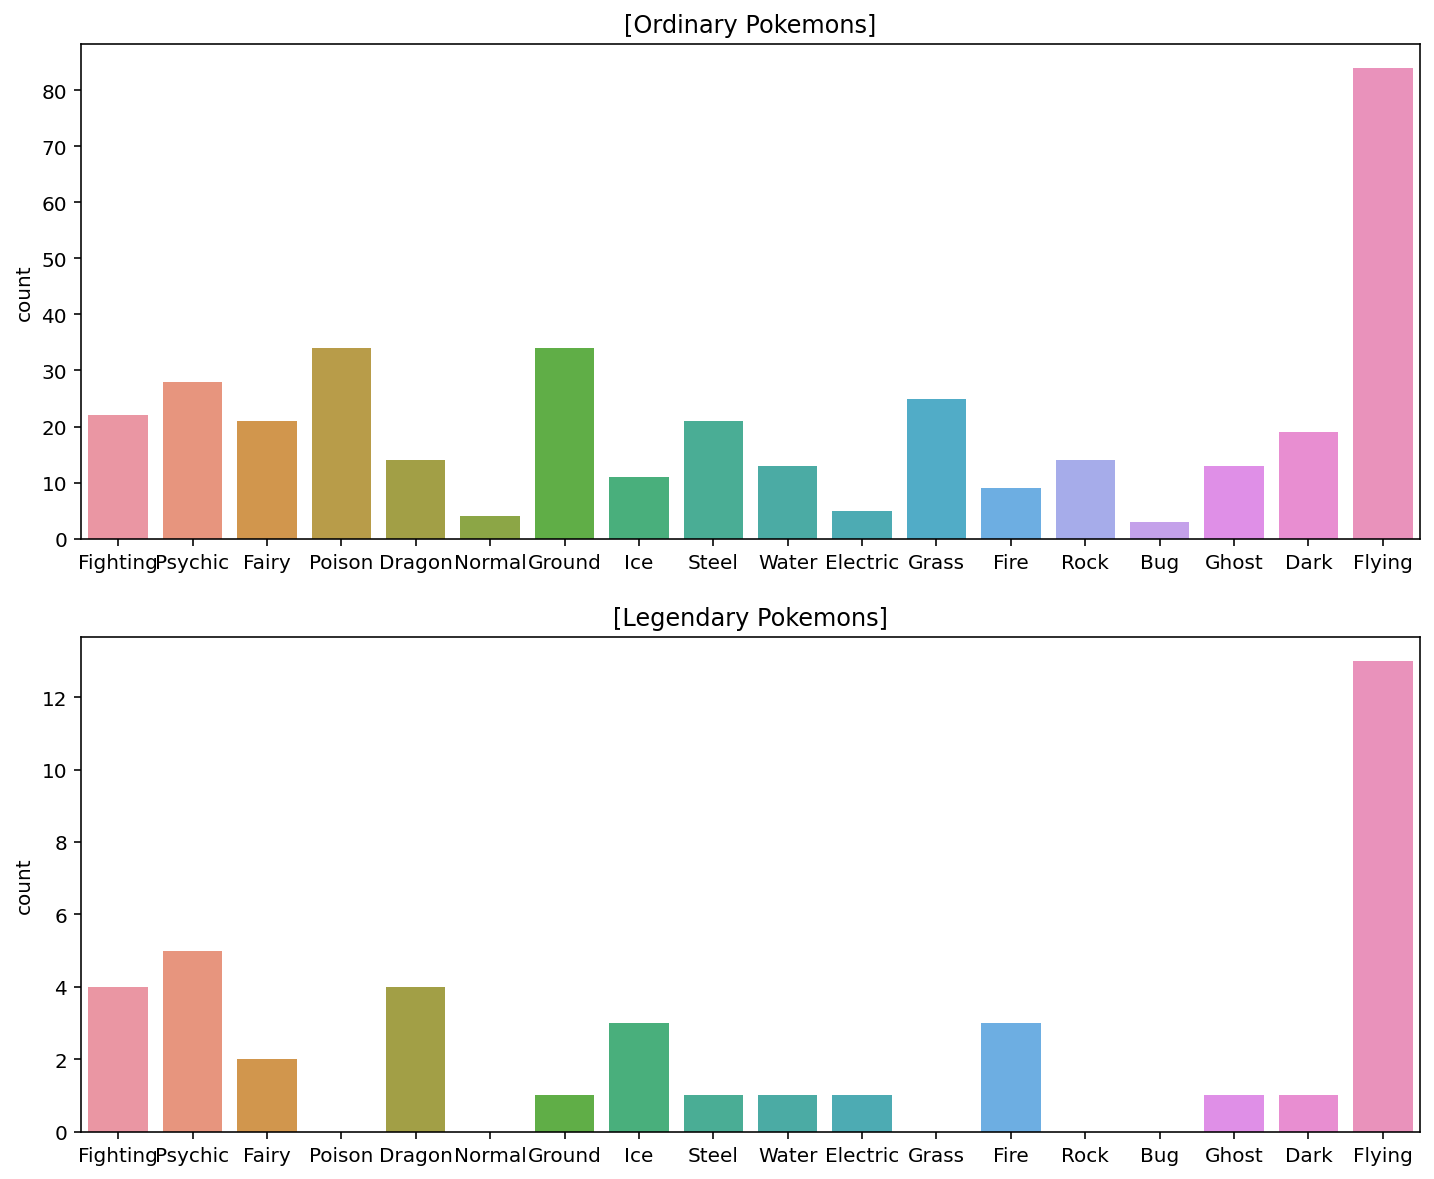

In [18]:
# NaN is automatically excluded when drawing a Countplot.
plt.figure(figsize=(12, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [19]:
# Pivot table showing the ratio of Legendary by Type 2.
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


**@Total of all stats**

In [20]:
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [21]:
# 0 index total of all stats validation.
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


: For the first Pokemon, the total value is 318.

In [22]:
# Check Pokemon with Total Values and All Stats
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))
# Set to axis = 1, because it must be added in the transverse direction.

800

**@Distribution plot according to Total value**

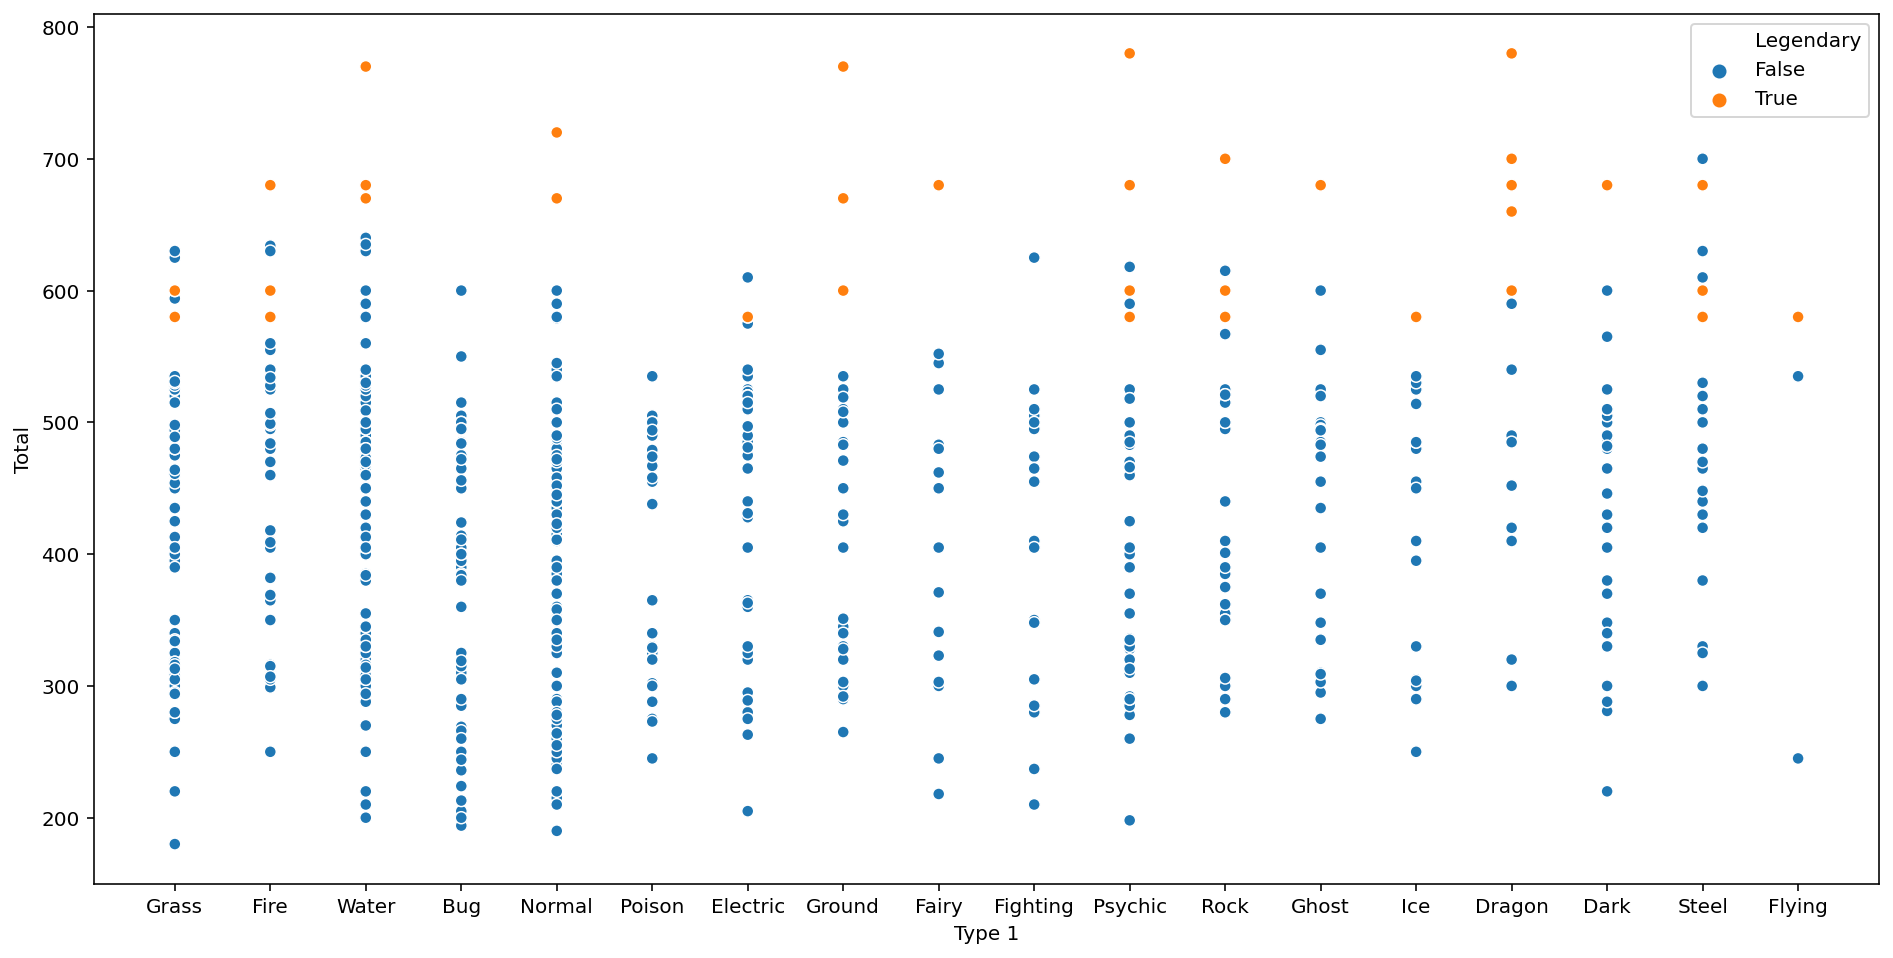

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

: Legendary Pokemon can be seen to have a high total stat value.

**@Detail stats distribution**

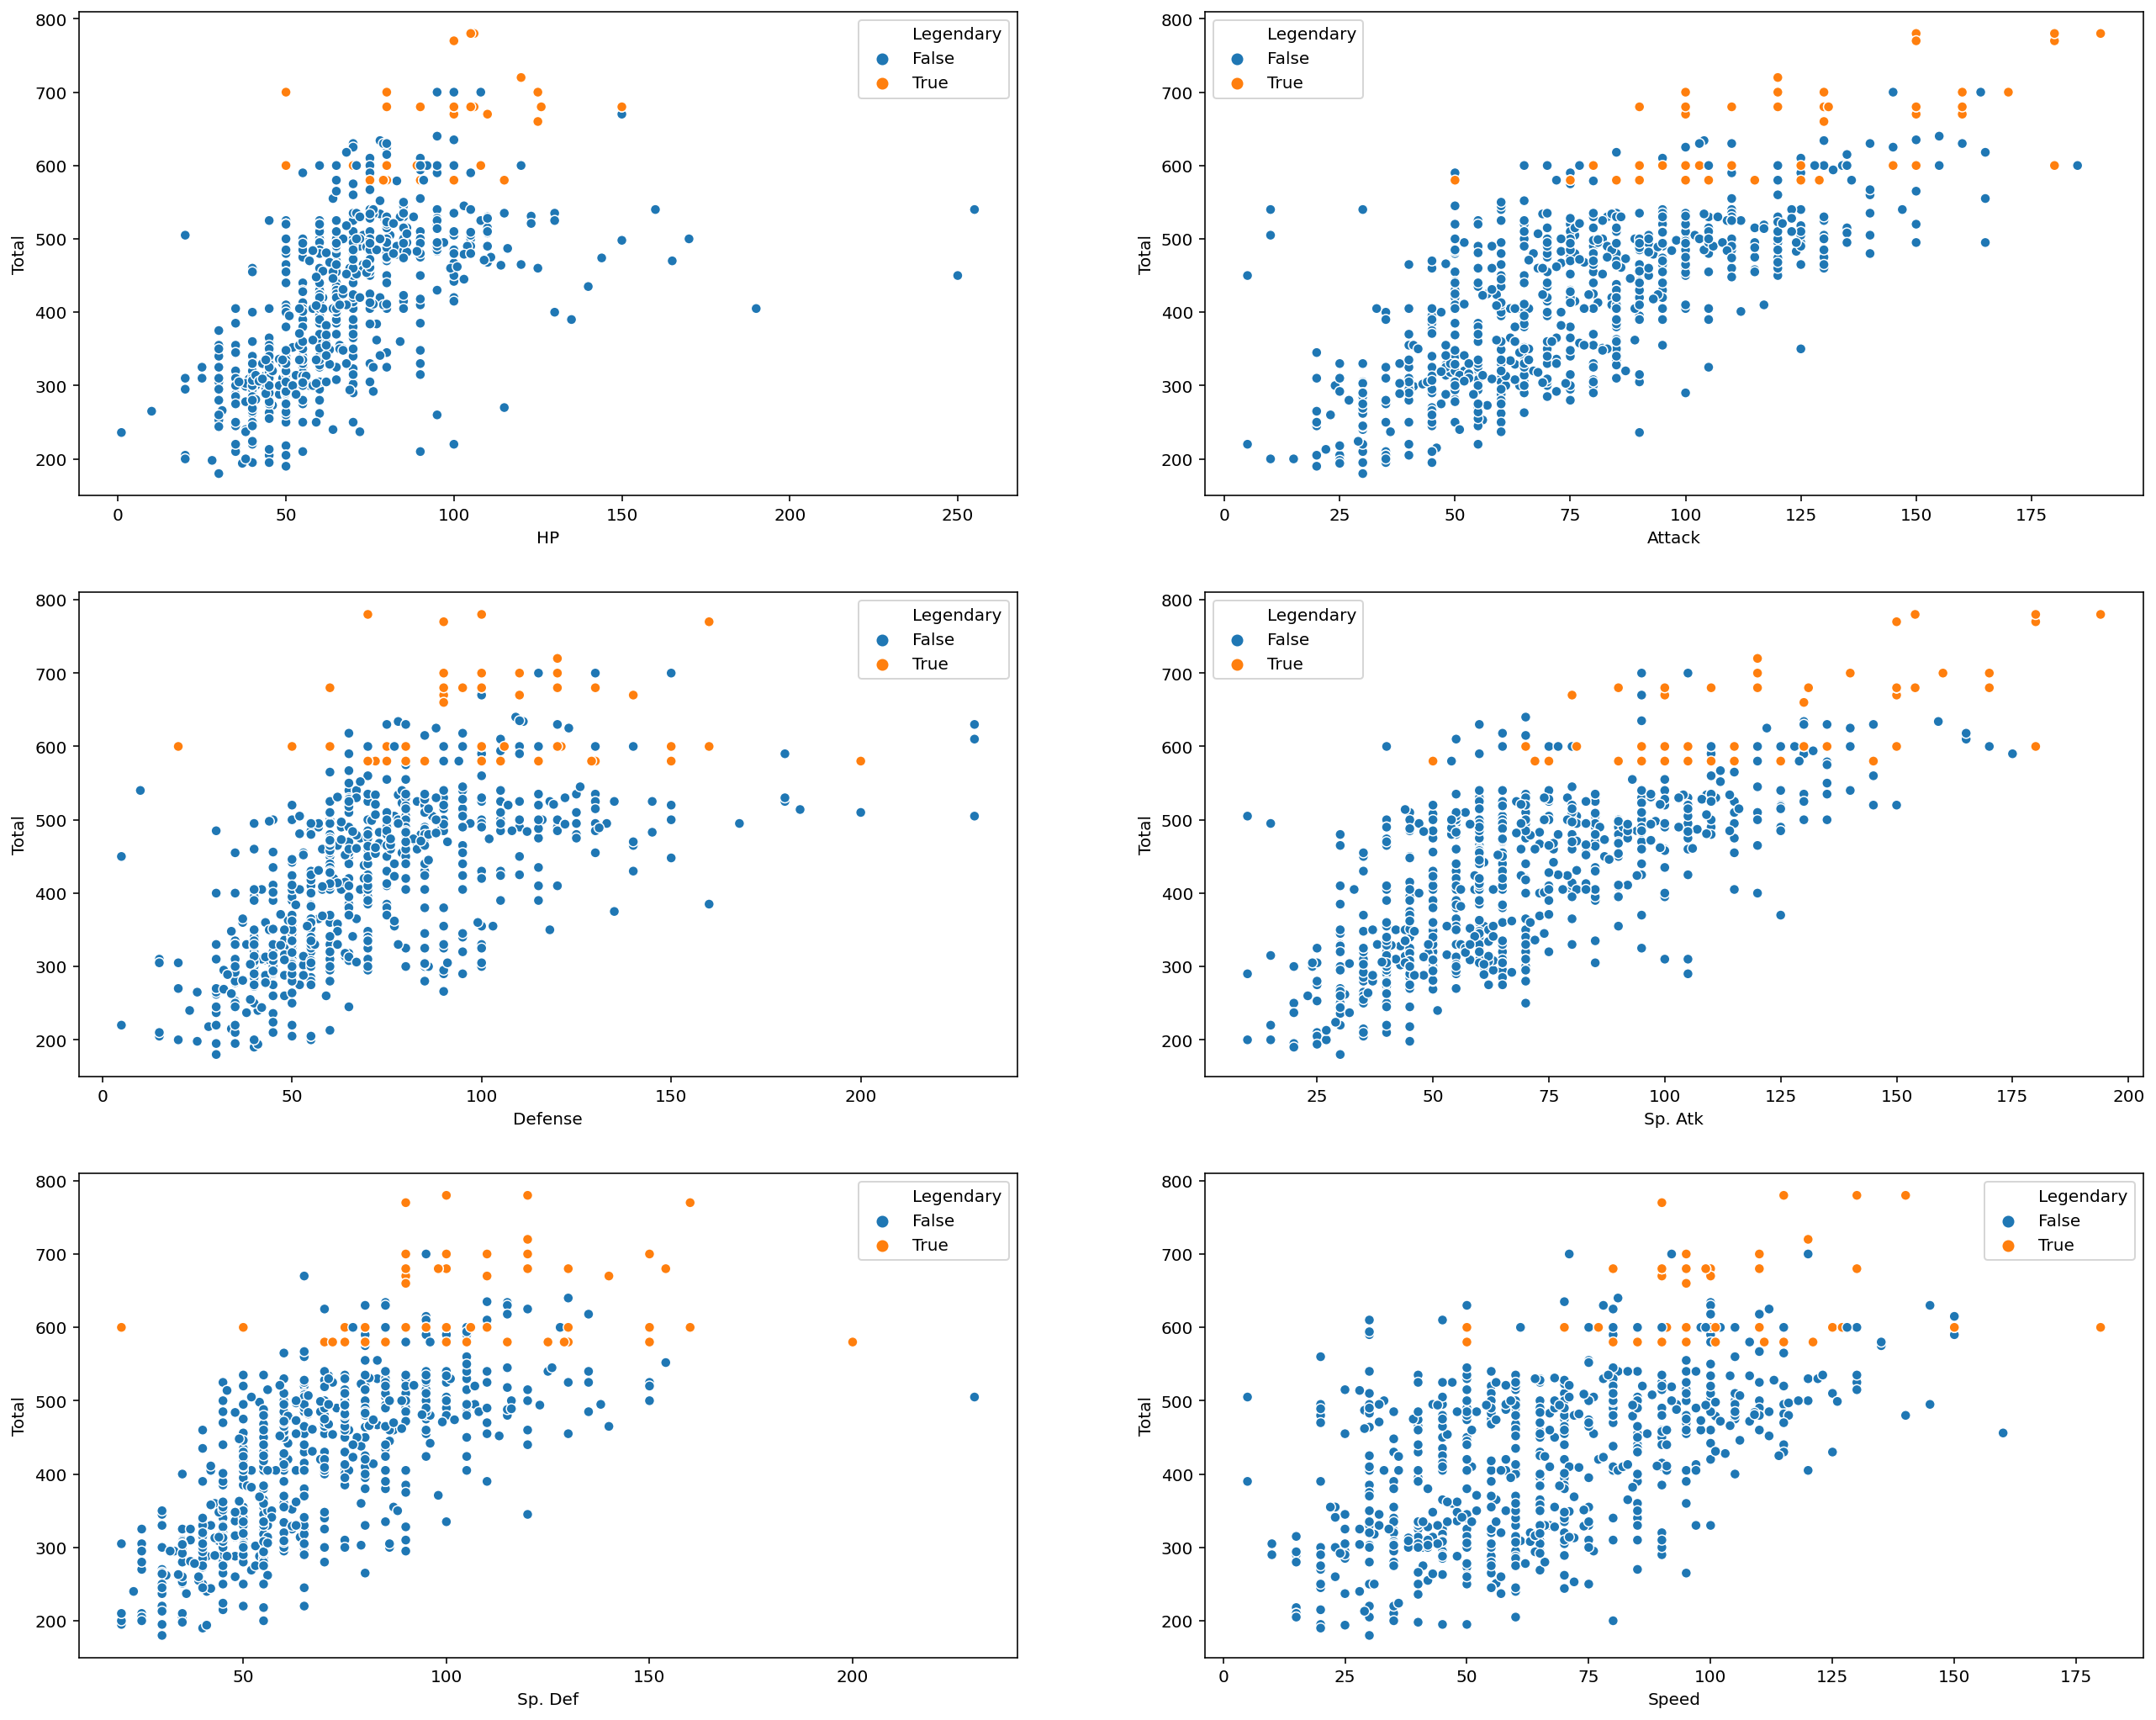

In [24]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(22,18)

sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

* HP, Defense, Sp. Def
    * Legendary Pokemon has a high stat, but in these three, there are some Pokemons whose ordinary Pokemon is particularly than the legendary Pokemon.
    * However, the total value of the Pokémon is not particularly high, so only certain stats are considered to be specially high, that is, Pokémon specialized in specific attributes.
* Attack, Sp. Atk, Speed
    * These three stats are almost proportional to Total.
    * Legendary Pokemon takes the maximum of each stat.

**@Generation of Pokemon**


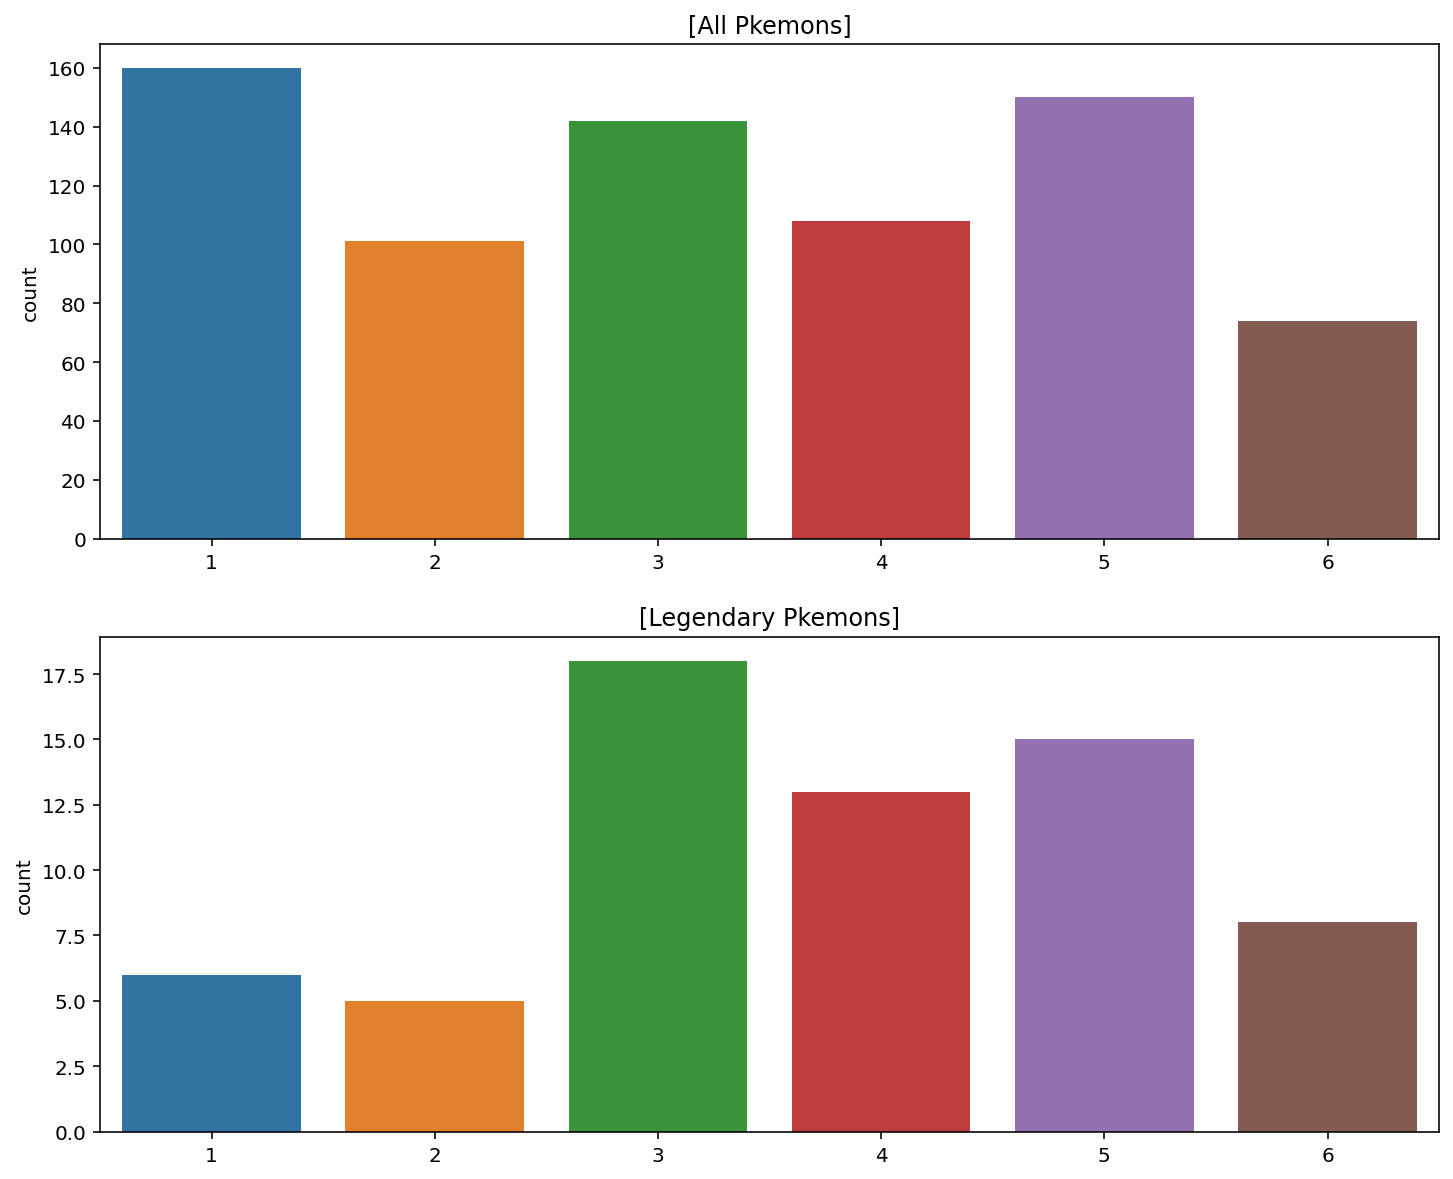

In [25]:
# Number of Pokemons in each generation. plt
plt.figure(figsize=(12, 10))   

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[All Pkemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pkemons]")
plt.show()

**@Feature segmentation**

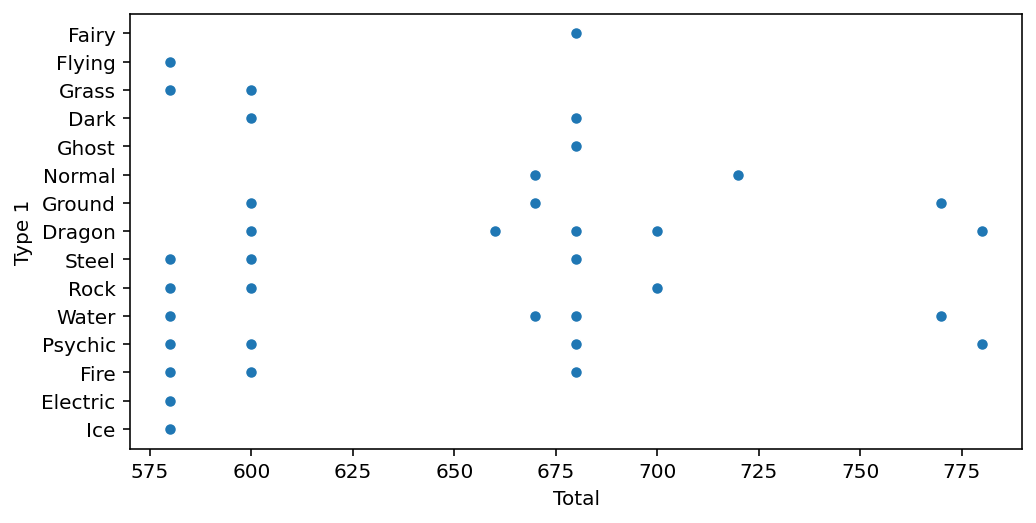

In [26]:
# total of all stat values in Legendary Pokemons.
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [27]:
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


: 9 Total Values.

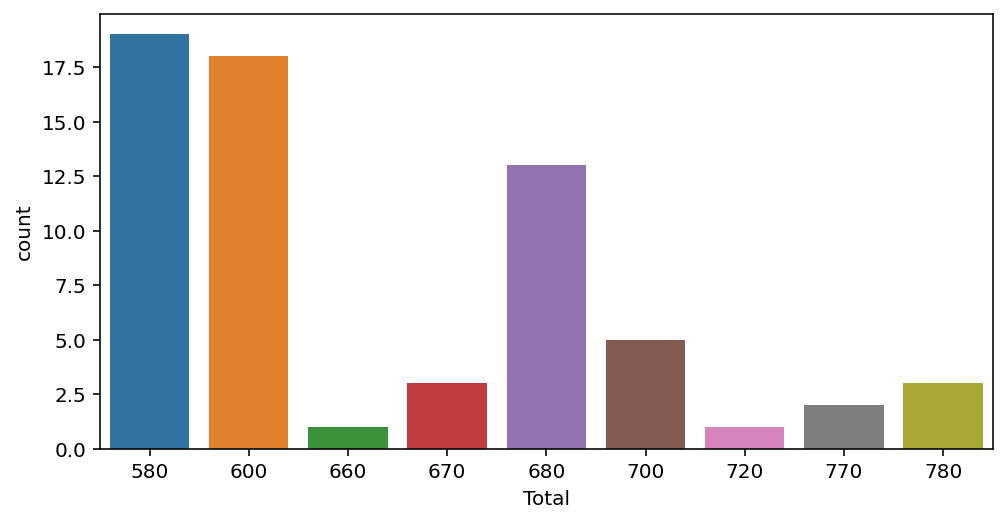

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [29]:
round(65 / 9, 2)

# About 7.22 have the same total stat value

7.22

In [30]:
# total of all stat values in Ordinary Pokemons.
len(sorted(list(set(ordinary["Total"]))))

195

In [31]:
round(735 / 195, 2)

# About 3.77 have the same total stat value

3.77

* Whether a Pokemon's total stat value is included in the legendary Pokemon's set of values is influenced by determining that it is a legendary Pokemon.
* Among the total values of legendary Pokemon, there is a total value that ordinary Pokemon does not have.
    * Total values are important columns for predicting whether or not they are legendary.

In [32]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


* name feature of legendary pokemons
    * Names tend to be similar.
    * If there are several legends of Pokemon with forme in.

In [33]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


**@Name length comparision**

In [34]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

<ipython-input-34-475154716e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [35]:
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

<ipython-input-35-f431457d820e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


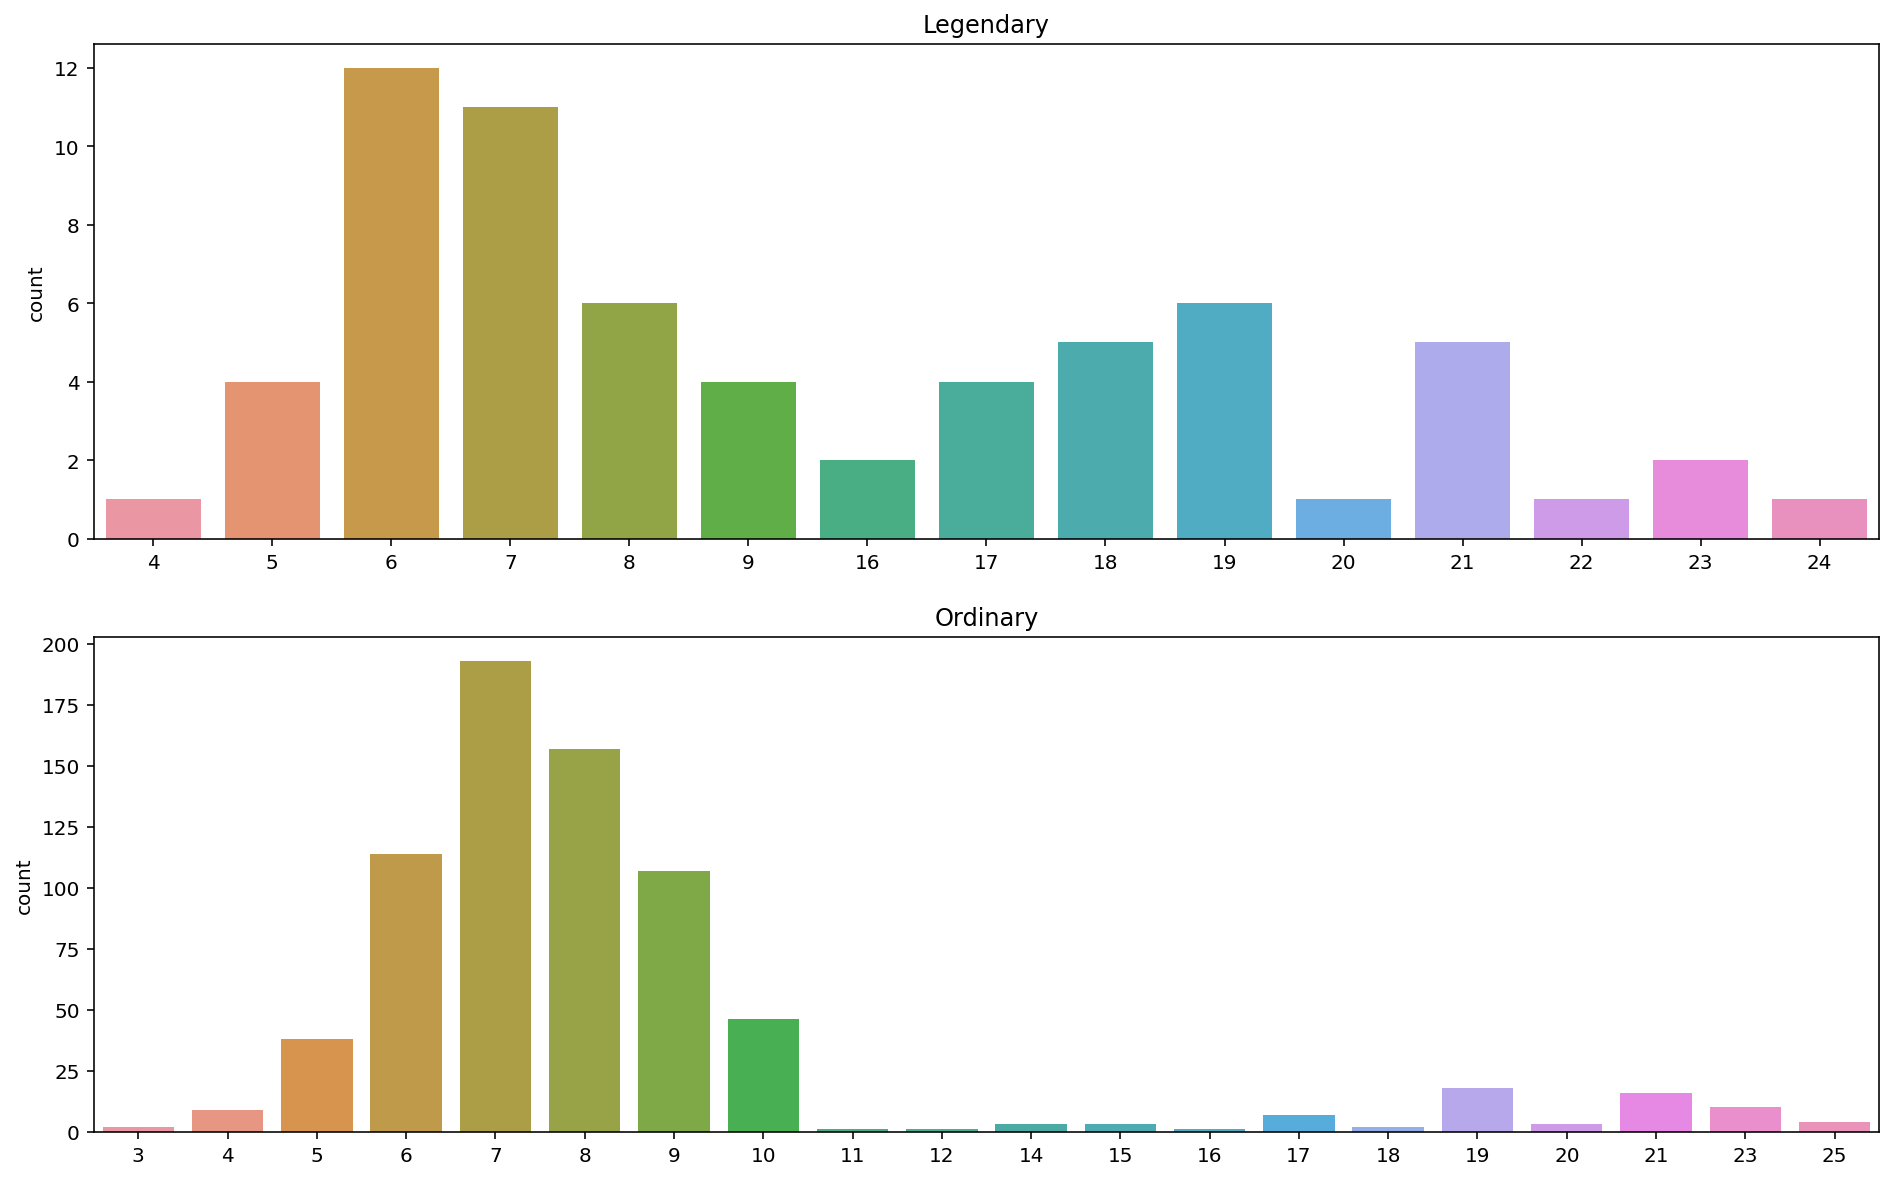

In [36]:
plt.figure(figsize=(16, 10))

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")

plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")

plt.show()

In [37]:
# Legendary pokemon name length is 10 or more probability. 
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [38]:
# Ordinary pokemon name length is 10 or more probability.
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


* If "Latios" is a legendary Pokemon, then "%%%Latios" is also a legendary Pokemon.
* At least there is a high frequency of names in the legendary Pokemon.
* Legendary Pokemon is likely to have a long name.

**@Create a categorical column: Agter generating the name_count column, whether the length exceeds 10 or not.**

In [39]:
pokemon["name_count"] = pokemon["Name"].apply(lambda i : len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [69]:
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,True,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,True,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,True,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,True,False,False,False,False,False,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,True,False,False,False,False,False,True


**@Token extractions often used in names**

* Name type of Pokemon
    * One word ex. Venusaur
    * Two words, the preceding word has two capital words and is divided into two parts based on capital words ex. BenusaurMegaVenusaur
    * Name is two words, and at the back, X, Y, the gender is displayed ex. CharizardMega Charizard X
    * Includes characters that are not alphabets ex. Zygarde50% Forme

* pre-process the name contains a non-alphathic words.

In [70]:
# Make a column that dosen't have a spacing for checking alphabet.

pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,True,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,True,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,True,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,True,False,False,False,False,False,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,True,False,False,False,False,False,True


In [71]:
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(0, 46)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name


In [72]:
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,...,False,False,False,False,False,False,False,False,False,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,...,False,False,False,False,False,False,False,False,False,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,...,False,False,False,False,False,False,False,False,True,True
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,...,False,False,False,False,False,False,False,False,False,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,...,False,False,False,False,False,False,False,False,False,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,...,False,False,False,True,False,False,False,False,True,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,...,False,False,False,False,False,False,False,False,False,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,...,False,False,False,False,False,False,False,False,False,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,...,False,False,False,False,False,False,False,False,False,True


In [73]:
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name


In [74]:
import re

# Separate and tokenize names based on spacing and capitalization.
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
        
    return np.array(tokens)

# tokenize legendary pokemons.
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [75]:
from collections import Counter

most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [76]:
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,True,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,True,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,True,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,False,True,False,False,False,False,False,False,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,True,False,False,False,False,False,True
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,True,False,False,False,False,False,True
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,True,False,False,False,False,True,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,False,False,True,False,False,False,False,False,True
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,False,False,True,False,False,False,False,True,True
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,True,False,False,False,False,False,False,False,False,False


: If the column value of the token is True, the Pokemon is likely to be a legendary Pokemon.

**@Type 1 & 2 categorical data preprocessing**

* All 18 Types are one-hot encoding.
* Pokemon with two attrivutes has a value of 1 in the right place for two types.

In [77]:
# pandas one-hot encoding.
print(types)

for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

['Fighting', 'Psychic', 'Fairy', 'Poison', 'Dragon', 'Normal', 'Ground', 'Ice', 'Steel', 'Water', 'Electric', 'Grass', 'Fire', 'Rock', 'Bug', 'Ghost', 'Dark', 'Flying']


,Type 1,Type 2,Fighting,Psychic,Fairy,Poison,Dragon,Normal,Ground,Ice,Steel,Water,Electric,Grass,Fire,Rock,Bug,Ghost,Dark,Flying
0,Grass,Poison,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
1,Grass,Poison,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Grass,Poison,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,Grass,Poison,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


**@Baselines that make them the most basic data.**

In [78]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [79]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [80]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [81]:
target = 'Legendary'

In [82]:
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [83]:
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


### 2. Model Learning

In [85]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=25)
model

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]], dtype=int64)

* TN (True Negative): A case where a rightly judged Negative, or General Pokemon, is properly judged as a General Pokemon.
* FP (False Positive): a wrongly judged Pokemon, or General Pokemon, is a case of misjudgment as a legendary Pokemon.
* FN (False Negative): a wrongly judged Negative, or Legendary Pokemon It is a case of misjudgment as a general Pokémon.
* TP (True Positive): A case of misjudgment of the rightly judged Positive, or Legendary Pokémon, as a legend's Pokémon.

In [87]:
print(152 / 160 * 100, "%")

95.0 %


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [89]:
print(len(pokemon.columns))
print(pokemon.columns)

46
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'lone_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Fighting', 'Psychic', 'Fairy', 'Poison', 'Dragon', 'Normal', 'Ground',
       'Ice', 'Steel', 'Water', 'Electric', 'Grass', 'Fire', 'Rock', 'Bug',
       'Ghost', 'Dark', 'Flying', 'long_name'],
      dtype='object')


* "#": Data corresponding to ID, except because it is not a feature with special meaning other than the meaning of index.
* "Name": String data, replaced by "name_count" and "long_name" through preprocessing, and 15 token columns.
* "name_nospace", "name_isalpha": columns needed for preprocessing, not necessary for classification analysis.
* "Type 1" & "Type 2": The attributes were processed with one-hot encoding.
* "Legendary": This column is target data, so it does not put it in the "X" data the model learns, but uses it as "y" data.

In [90]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count', 'long_name', 'Forme', 'Mega', 'Mewtwo', 'Kyurem', 'Deoxys', 'Hoopa', 
            'Latias', 'Latios', 'Kyogre', 'Groudon', 'Poison', 'Water', 'Steel', 'Grass', 
            'Bug', 'Normal', 'Fire', 'Fighting', 'Electric', 'Psychic', 'Ghost', 'Ice', 
            'Rock', 'Dark', 'Flying', 'Ground', 'Dragon', 'Fairy']

len(features)

38

In [91]:
target = "Legendary"
target

'Legendary'

In [92]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Electric,Psychic,Ghost,Ice,Rock,Dark,Flying,Ground,Dragon,Fairy
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [68]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [94]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [96]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [97]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]], dtype=int64)

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160

